# 500 Trials of Epidemic Model Investigation

This program will create 500 epeidemic cities and keep track of the number of sick people after 80 steps in each. The results are shown in a histogram. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

class WrappedGrid:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width))

    def get(self, x, y): 
        return self.grid[y % self.height][x % self.width]

    def set(self, x, y, value):
        self.grid[y % self.height][x % self.width] = value

class Person:
    def __init__(self, grid, is_sick=False):
        self.grid = grid
        self.x = random.randint(0, grid.width - 1)  # Initial x-coordinate
        self.y = random.randint(0, grid.height - 1)  # Initial y-coordinate
        self.is_sick = is_sick
        self.sickness_duration = 0
        self.sickduration_rate = random.uniform(0.1, 0.3)  # Random immunity rate between 0.1 and 0.3

    def move(self):
        dx = random.randint(-1, 1)  # Move left, right, or stay
        dy = random.randint(-1, 1)  # Move up, down, or stay

        new_x = (self.x + dx) % self.grid.width
        new_y = (self.y + dy) % self.grid.height

        if self.grid.get(new_x, new_y) != 1:
            self.x = new_x
            self.y = new_y
            if self.is_sick:
                self.transmit_sickness(new_x, new_y)
                self.update_sickness_duration()

    def transmit_sickness(self, x, y):
        for person in people:
            if person.x == x and person.y == y and not person.is_sick:
                if random.random() < 0.95:
                    person.is_sick = True

    def update_sickness_duration(self):
        if self.is_sick:
            self.sickness_duration += 1
            if self.sickness_duration >= 25:  # Assuming a sickness duration of 10 time steps
                #self.is_sick = False
                if random.random() < self.sickduration_rate:
                    self.is_sick = False
                    self.sickness_duration = 0
            else:
                self.is_sick

    def get_position(self):
        return self.x, self.y

class Visualizer:
    def __init__(self, grid, people):
        self.grid = grid
        self.people = people
 
    def visualize(self, frame_count):
        plt.figure(figsize=(5, 5))
        plt.imshow(self.grid.grid, cmap='binary', origin='lower')

        for person in self.people:
            if person.is_sick:
                plt.scatter(person.x, person.y, color='red', marker='o', s=20)  # Sick person in red
            else:
                plt.scatter(person.x, person.y, color='blue', marker='o', s=14)  # Healthy person in blue

        plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
        #plt.xlabel('X')
        #plt.ylabel('Y')
        plt.suptitle('Epidemic in City')
        plt.title('Frame {}'.format(frame_count))

        plt.show()
        #plt.savefig('first_plot.png')

# Size of city
width = 50
height = 50
grid = WrappedGrid(width, height)

# Set some obstacles! Random. Change how many obtsacles you want in range()
for k in range(25):
    grid.set(random.randint(0, width), random.randint(0, width), 1)

In [3]:

# Number of trials
num_trials = 500

# Array to store the final number of sick people in each trial
final_sick_counts = []

for _ in range(num_trials):
    # Reset the grid and people for each trial
    grid = WrappedGrid(width, height)

    # Set some obstacles!
    for k in range(25):
        grid.set(random.randint(0, width), random.randint(0, width), 1)

    # Create people and visualizer
    people = [Person(grid) for _ in range(420)]  # Creating people
    people[0].is_sick = True  # Making the first person sick
    visualizer = Visualizer(grid, people)

    # Move the people around the grid
    for frame_counter in range(80):
        for person in people:
            person.move()
        
        # Check and store the count of sick people in the final frame
        if frame_counter == 79:
            num_sick_final_frame = sum(1 for person in people if person.is_sick)
            final_sick_counts.append(num_sick_final_frame)

# Print the final number of sick people in each trial
print("Final number of sick people in each trial:", final_sick_counts)


Final number of sick people in each trial: [68, 55, 137, 0, 136, 124, 114, 146, 116, 91, 39, 77, 45, 163, 106, 89, 129, 103, 97, 126, 42, 151, 111, 121, 119, 106, 148, 54, 121, 106, 161, 57, 125, 159, 138, 70, 94, 48, 97, 142, 140, 122, 152, 58, 117, 98, 78, 92, 0, 79, 86, 88, 43, 86, 104, 93, 111, 54, 102, 73, 135, 31, 82, 10, 123, 86, 117, 107, 140, 131, 60, 76, 38, 104, 143, 92, 127, 127, 62, 55, 117, 94, 108, 88, 82, 56, 161, 60, 98, 16, 51, 36, 0, 80, 91, 106, 87, 138, 112, 104, 90, 112, 62, 64, 70, 85, 51, 175, 135, 118, 73, 56, 43, 158, 0, 53, 120, 205, 90, 60, 127, 133, 11, 156, 31, 144, 210, 141, 130, 167, 124, 104, 127, 64, 144, 132, 116, 99, 69, 37, 57, 139, 67, 58, 177, 27, 110, 162, 95, 178, 30, 102, 117, 105, 119, 171, 95, 14, 176, 105, 107, 97, 159, 152, 142, 111, 130, 124, 38, 0, 65, 136, 102, 172, 74, 86, 45, 142, 129, 111, 82, 0, 166, 106, 154, 115, 9, 76, 87, 41, 209, 148, 169, 119, 90, 75, 129, 86, 39, 43, 55, 74, 53, 147, 85, 102, 118, 75, 0, 0, 135, 101, 140, 38, 

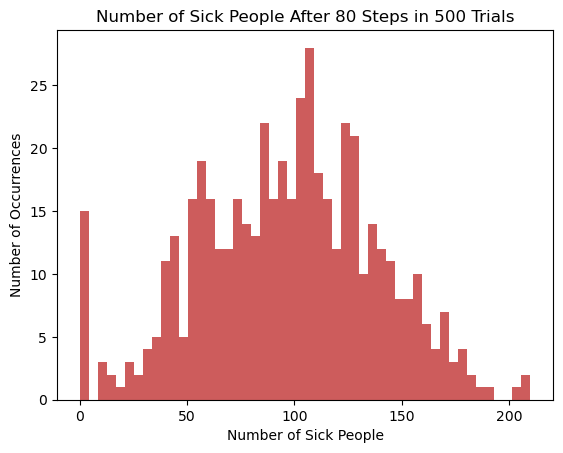

In [4]:
mean = np.mean(final_sick_counts)
std = np.std(final_sick_counts)
median = np.median(final_sick_counts)


plt.figure()
plt.hist(final_sick_counts, bins=50, color='indianred')
plt.title('Number of Sick People After 80 Steps in 500 Trials')
plt.xlabel('Number of Sick People')
plt.ylabel('Number of Occurrences')
plt.savefig('sick_hist.png')